In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import saopaulo
import models
import mscthesis
import pandas as pd
import geopandas as gpd
import validation
import numpy as np
import datetime
import genericvalidation
import matplotlib as mpl

In [4]:
sampler = models.Sampler(
    model=models.PreferentialReturn(
        p=0.2,
        gamma=0.8,
        region_sampling=models.RegionTransitionZipf(
            beta=0.05,
        ),
        jump_size_sampling=models.JumpSizeTrueProb(),
    ),
    daily_trips_sampling=models.NormalDistribution(3.14, 1.8),
    n_days=7*20,
    geotweets_path="",
)

In [5]:
geotweets = mscthesis.read_geotweets_raw("../../dbs/saopaulo/geotweets.csv").set_index('userid')

# Only look at weekday trips
geotweets = geotweets[(geotweets['weekday'] < 6) & (0 < geotweets['weekday'])]

# Remove users who don't have home visit in geotweets
home_visits = geotweets.query("label == 'home'").groupby('userid').size()
geotweets = geotweets.loc[home_visits.index]

# Remove users with less than 20 tweets
tweetcount = geotweets.groupby('userid').size()
geotweets = geotweets.drop(labels=tweetcount[tweetcount < 20].index)

# Remove users with only one region
regioncount = geotweets.groupby(['userid', 'region']).size().groupby('userid').size()
geotweets = geotweets.drop(labels=regioncount[regioncount < 2].index)

# Ensure the tweets are sorted chronologically
geotweets = geotweets.sort_values(by=['userid', 'createdat'])

In [6]:
geotweets.shape

(2701061, 12)

In [7]:
baseline = models.geotweets_to_visits(geotweets)

In [127]:
geotweetsx = geotweets.loc[geotweets.groupby('userid').size()[:1000].index]

In [8]:
print(datetime.datetime.now())
visits = sampler.sample(geotweets)
print(datetime.datetime.now())

2020-05-08 11:41:09.502626
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 16 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 35 iterations
IPF converged after 10 iterations
IPF converged after 27 iterations
IPF converged after 5 iterations
IPF converged after 8 iterations
IPF converged after 32 iterations
IPF converged after 41 iterations
IPF converged after 19 iterations
IPF converged after 38 iterations
IPF converged after 11 iterations
IPF converged after 18 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 4 iterations
IPF converged after 16 iterations
IPF converged after 11 iterations
IPF converged after 30 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 10 iterations

IPF converged after 5 iterations
IPF converged after 16 iterations
IPF converged after 11 iterations
IPF converged after 11 iterations
IPF converged after 32 iterations
done with 250
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 10 iterations
IPF converged after 35 iterations
IPF converged after 19 iterations
IPF converged after 17 iterations
IPF converged after 16 iterations
IPF converged after 5 iterations
IPF converged after 39 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 10 iterations
IPF converged after 5 iterations
IPF converged after 39 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 12 iterations
IPF converged after 12 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 12 iterations
IPF converged after 3 iterations
IPF converged after 12 iterations
IPF converged after 3 iterations
IPF converg

IPF converged after 25 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 8 iterations
IPF converged after 5 iterations
IPF converged after 6 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 17 iterations
IPF converged after 14 iterations
done with 500
IPF converged after 25 iterations
IPF converged after 3 iterations
IPF converged after 2 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 30 iterations
IPF converged after 11 iterations
IPF converged after 11 iterations
IPF converged after 19 iterations
IPF converged after 12 iterations
IPF converged after 9 iterations
IPF converged after 6 iterations
IPF converged after 6 iterations
IPF converged after 12 iterations
IPF converged after 7 iterations
IPF converged after 15 iterations
IPF converged after 5 iterations
IPF converged af

IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 12 iterations
IPF converged after 10 iterations
IPF converged after 8 iterations
IPF converged after 25 iterations
IPF converged after 3 iterations
IPF converged after 11 iterations
IPF converged after 21 iterations
IPF converged after 37 iterations
IPF converged after 39 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
done with 750
IPF converged after 43 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 17 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 20 iterations
IPF converged after 6 iterations
IPF converged after 7 iterations
IPF converged after 8 iterations
IPF converged after 25 iterations
IPF converged after 6 iterations
IPF converged after 7 iterations
IPF converged after 13 iterations
IPF converged a

IPF converged after 9 iterations
IPF converged after 12 iterations
IPF converged after 18 iterations
IPF converged after 22 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 29 iterations
IPF converged after 17 iterations
IPF converged after 13 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 16 iterations
IPF converged after 19 iterations
IPF converged after 3 iterations
IPF converged after 20 iterations
IPF converged after 33 iterations
IPF converged after 19 iterations
IPF converged after 12 iterations
IPF converged after 8 iterations
done with 1000
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 11 iterations
IPF converged after 18 iterations
IPF converged after 16 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 12 iterations
IPF converg

IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 8 iterations
IPF converged after 5 iterations
IPF converged after 24 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 11 iterations
IPF converged after 15 iterations
IPF converged after 4 iterations
IPF converged after 11 iterations
IPF converged after 19 iterations
IPF converged after 12 iterations
IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 30 iterations
IPF converged after 18 iterations
IPF converged after 11 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
done with 1250
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 15 iterations
IPF converged after 13 iterations
IPF converge

IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 11 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 12 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 25 iterations
IPF converged after 13 iterations
IPF converged after 24 iterations
IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 11 iterations
IPF converged after 17 iterations
IPF converged after 4 iterations
IPF converged after 36 iterations
IPF converged after 10 iterations
IPF converged after 7 iterations
IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 10 iterations
IPF converged after 5 iteratio

IPF converged after 4 iterations
IPF converged after 19 iterations
IPF converged after 10 iterations
IPF converged after 4 iterations
IPF converged after 28 iterations
IPF converged after 16 iterations
IPF converged after 21 iterations
IPF converged after 6 iterations
IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 6 iterations
IPF converged after 10 iterations
IPF converged after 4 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 16 iterations
IPF converged after 19 iterations
IPF converged after 23 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 26 iterations
IPF converged after 7 iterations
IPF converged after 8 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 9 iterations
IPF converged after 13 iterations
IPF converged after 15 iterations
IPF converged after 10 iterations
IPF converged after 5 itera

IPF converged after 3 iterations
IPF converged after 9 iterations
IPF converged after 35 iterations
IPF converged after 3 iterations
IPF converged after 16 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 19 iterations
IPF converged after 19 iterations
IPF converged after 7 iterations
IPF converged after 26 iterations
IPF converged after 26 iterations
IPF converged after 12 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 29 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 18 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 22 iterations
IPF converged after 18 iterations
IPF converged after 34 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 12 iterations
IPF converged after 8 iterat

IPF converged after 19 iterations
IPF converged after 8 iterations
IPF converged after 9 iterations
IPF converged after 9 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 9 iterations
IPF converged after 3 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 26 iterations
IPF converged after 14 iterations
IPF converged after 13 iterations
IPF converged after 9 iterations
IPF converged after 10 iterations
IPF converged after 19 iterations
IPF converged after 4 iterations
IPF converged after 13 iterations
IPF converged after 15 iterations
IPF converged after 6 iterations
IPF converged after 18 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 23 iterations
IPF converged after 10 iterations
IPF converged after 20 iterations
IPF converged after 19 iterati

IPF converged after 9 iterations
IPF converged after 9 iterations
IPF converged after 9 iterations
IPF converged after 7 iterations
IPF converged after 15 iterations
IPF converged after 19 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 17 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 2 iterations
IPF converged after 9 iterations
IPF converged after 6 iterations
IPF converged after 17 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 12 iterations
IPF converged after 8 iterations
IPF converged after 2 iterations
IPF converged after 14 iterations
IPF converged after 18 iterations
IPF converged after 22 iterations
IPF converged after 36 iterations
IPF converged after 2 iterations
IPF converged after 5 iterations


IPF converged after 7 iterations
IPF converged after 15 iterations
IPF converged after 19 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 27 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 13 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 2 iterations
IPF converged after 26 iterations
IPF converged after 4 iterations
IPF converged after 22 iterations
IPF converged after 15 iterations
IPF converged after 22 iterations
IPF converged after 16 iterations
IPF converged after 19 iterations
IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 12 iteration

IPF converged after 20 iterations
IPF converged after 9 iterations
IPF converged after 7 iterations
IPF converged after 13 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 33 iterations
IPF converged after 13 iterations
IPF converged after 9 iterations
IPF converged after 11 iterations
IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 18 iterations
IPF converged after 17 iterations
IPF converged after 5 iterations
IPF converged after 22 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 13 iterations
IPF converged after 22 iterations
IPF converged after 17 iterations
IPF converged after 10 iterations
IPF converged after 7 iterations
IPF converged after 20 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 24 iterat

IPF converged after 3 iterations
IPF converged after 23 iterations
IPF converged after 19 iterations
IPF converged after 31 iterations
IPF converged after 9 iterations
IPF converged after 17 iterations
IPF converged after 32 iterations
IPF converged after 3 iterations
IPF converged after 9 iterations
IPF converged after 12 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 8 iterations
IPF converged after 18 iterations
IPF converged after 22 iterations
IPF converged after 16 iterations
IPF converged after 23 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 19 iterations
IPF converged after 6 iterations
IPF converged after 30 iterations
IPF converged after 15 iterations
IPF converged after 7 iterations
IPF converged after 15 iterations
IPF converged after 6 iterations
IPF converged after 17 iterations
IPF converged after 3 iterations
IPF converged after 3 itera

IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 46 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 23 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 18 iterations
IPF converged after 23 iterations
IPF converged after 24 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 7 iterations
IPF converged after 27 iterations
IPF converged after 5 iterations
IPF converged after 3 iterations
IPF converged after 16 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations

IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 6 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 7 iterations
IPF converged after 6 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 7 iterations
IPF converged after 17 iterations
IPF converged after 17 iterations
IPF converged after 4 iterations
IPF converged after 26 iterations
IPF converged after 10 iterations
IPF converged after 11 iterations
IPF converged after 9 iterations
IPF converged after 28 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
IPF converged after 24 iterat

IPF converged after 12 iterations
IPF converged after 22 iterations
IPF converged after 5 iterations
IPF converged after 11 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 33 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 6 iterations
IPF converged after 25 iterations
IPF converged after 7 iterations
IPF converged after 13 iterations
IPF converged after 12 iterations
IPF converged after 21 iterations
IPF converged after 12 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 21 iterations
IPF converged after 16 iterations
IPF converged after 27 iterations
IPF converged after 24 iterations
IPF converged after 13 iterations
IPF converged after 12 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 27 it

IPF converged after 3 iterations
IPF converged after 9 iterations
IPF converged after 18 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 22 iterations
IPF converged after 8 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 24 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 21 iterations
IPF converged after 4 iterations
IPF converged after 14 iterations
IPF converged after 12 iterations
IPF converged after 20 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 7 iterations
IPF converged after 13 iterations
IPF converged after 21 iterations
IPF converged after 11 iterations
IPF converged after 11 iterations
IPF converged after 14 iterations
IPF converged after 2 iterations
IPF converged after 19 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 4 iterat

IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 19 iterations
IPF converged after 5 iterations
IPF converged after 34 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 21 iterations
IPF converged after 13 iterations
IPF converged after 19 iterations
IPF converged after 2 iterations
IPF converged after 3 iterations
IPF converged after 24 iterations
IPF converged after 17 iterations
IPF converged after 15 iterations
IPF converged after 14 iterations
IPF converged after 5 iterations
IPF converged after 7 iterations
IPF converged after 14 iterations
IPF converged after 7 iterations
IPF converged after 3 iterations
IPF converged after 16 iterations
IPF converged after 7 iterations
IPF converged after 3 iterations
IPF converged after 25 iterations
IPF converged after 16 iterations
IPF converged after 2 iterations
IPF converged after 21 iterations
IPF converged after 14 iterations
IPF converged after 4 iterat

IPF converged after 3 iterations
IPF converged after 18 iterations
IPF converged after 21 iterations
IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 8 iterations
IPF converged after 14 iterations
IPF converged after 11 iterations
IPF converged after 12 iterations
IPF converged after 11 iterations
IPF converged after 8 iterations
IPF converged after 28 iterations
IPF converged after 10 iterations
IPF converged after 15 iterations
IPF converged after 7 iterations
IPF converged after 29 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 11 iterations
IPF converged after 4 iterations
IPF converged after 9 iterations
IPF converged after 6 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 6 iterations
IPF converged after 10 iterations
IPF converged after 11 iterations
IPF converged after 6 iterations
IPF converged after 4 iterat

IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 14 iterations
IPF converged after 9 iterations
IPF converged after 6 iterations
IPF converged after 2 iterations
IPF converged after 7 iterations
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 16 iterations
IPF converged after 14 iterations
IPF converged after 13 iterations
IPF converged after 4 iterations
IPF converged after 21 iterations
IPF converged after 16 iterations
IPF converged after 4 iterations
IPF converged after 27 iterations
IPF converged after 26 iterations
IPF converged after 8 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 6 iterations
IPF converged after 7 iterations
IPF converged after 10 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 27 iterations
IPF converged after 3 iterations
IPF converged after 13 iterati

IPF converged after 14 iterations
IPF converged after 6 iterations
IPF converged after 25 iterations
IPF converged after 3 iterations
IPF converged after 24 iterations
IPF converged after 39 iterations
IPF converged after 38 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 22 iterations
IPF converged after 2 iterations
IPF converged after 8 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 5 iterations
IPF converged after 38 iterations
IPF converged after 6 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 29 iterations
IPF converged after 4 iterations
IPF converged after 28 iterations
IPF converged after 10 iterations
IPF converged after 14 iterations
IPF converged after 11 iterations
IPF converged after 25 iterations
IPF converged after 7 iterations
IPF converged after 10 iterations
IPF converged after 4 iterations
IPF converged after 6 iterat

IPF converged after 31 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 23 iterations
IPF converged after 11 iterations
IPF converged after 21 iterations
IPF converged after 27 iterations
IPF converged after 8 iterations
IPF converged after 19 iterations
IPF converged after 10 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations


IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 2 iterations
IPF converged after 13 iterations
IPF converged after 10 iterations
IPF converged after 23 iterations
IPF converged after 9 iterations
IPF converged after 9 iterations
IPF converged after 21 iterations
IPF converged after 2 iterations
IPF converged after 7 iterations
IPF converged after 11 iterations
IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 28 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 22 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 22 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 16 iterations
IPF converged after 19 iterations
IPF converged after 8 iteratio

IPF converged after 28 iterations
IPF converged after 20 iterations
IPF converged after 8 iterations
IPF converged after 17 iterations
IPF converged after 6 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 10 iterations
IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 9 iterations
IPF converged after 25 iterations
IPF converged after 13 iterations
IPF converged after 15 iterations
IPF converged after 5 iterations
IPF converged after 13 iterations
IPF converged after 7 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 15 iterations
IPF converged after 2 iterations
IPF converged after 20 iterations
IPF converged after 2 iterations
IPF converged after 15 iteration

IPF converged after 4 iterations
IPF converged after 24 iterations
IPF converged after 20 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 7 iterations
IPF converged after 7 iterations
IPF converged after 7 iterations
IPF converged after 11 iterations
IPF converged after 19 iterations
IPF converged after 24 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 2 iterations
IPF converged after 17 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 18 iterations
IPF converged after 16 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 40 iterations
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations

IPF converged after 7 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 14 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 13 iterations
IPF converged after 28 iterations
IPF converged after 9 iterations
IPF converged after 15 iterations
IPF converged after 12 iterations
IPF converged after 14 iterations
IPF converged after 12 iterations
IPF converged after 14 iterations
IPF converged after 13 iterations
IPF converged after 31 iterations
IPF converged after 2 iterations
IPF converged after 18 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 25 iterations
IPF converged after 7 iterations
IPF converged after 10 iterations
IPF converged after 8 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 14 iterations
IPF converged after 7 iterations
IPF converged after 2 iter

IPF converged after 6 iterations
IPF converged after 24 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 12 iterations
IPF converged after 10 iterations
IPF converged after 6 iterations
IPF converged after 24 iterations
IPF converged after 7 iterations
IPF converged after 19 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 14 iterations
IPF converged after 3 iterations
IPF converged after 13 iterations
IPF converged after 4 iterations
IPF converged after 20 iterations
IPF converged after 26 iterations
IPF converged after 4 iterations
IPF converged after 18 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 24 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 21 iterations
IPF converged after 3 iteration

IPF converged after 15 iterations
IPF converged after 9 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 15 iterations
IPF converged after 33 iterations
IPF converged after 10 iterations
IPF converged after 14 iterations
IPF converged after 12 iterations
IPF converged after 13 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 25 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 43 iterations
IPF converged after 5 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 14 iterations
IPF converged after 4 iterations
IPF converged after 7 iterations
IPF converged after 8 iterations
IPF converged after 6 iterations

IPF converged after 6 iterations
IPF converged after 15 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 15 iterations
IPF converged after 21 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 24 iterations
IPF converged after 5 iterations
IPF converged after 24 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 22 iterations
IPF converged after 2 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 9 iterations
IPF converged after 20 iterations
IPF converged after 11 iterations
IPF converged after 7 iterations
IPF converged after 2 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 14 iterations
IPF converged after 6 iterations
IPF converged after 22 iterations


IPF converged after 23 iterations
IPF converged after 18 iterations
IPF converged after 29 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 5 iterations
IPF converged after 12 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 11 iterations
IPF converged after 24 iterations
IPF converged after 11 iterations
IPF converged after 6 iterations
IPF converged after 29 iterations
IPF converged after 16 iterations
IPF converged after 6 iterations
IPF converged after 21 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 13 iterations
IPF converged after 20 iterations
IPF converged after 13 iterations
IPF converged after 19 iterations
IPF converged after 12 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 11 it

IPF converged after 26 iterations
IPF converged after 6 iterations
IPF converged after 10 iterations
IPF converged after 12 iterations
IPF converged after 1 iterations
IPF converged after 36 iterations
IPF converged after 3 iterations
IPF converged after 13 iterations
IPF converged after 6 iterations
IPF converged after 18 iterations
IPF converged after 10 iterations
IPF converged after 2 iterations
IPF converged after 22 iterations
IPF converged after 13 iterations
IPF converged after 3 iterations
IPF converged after 26 iterations
IPF converged after 15 iterations
IPF converged after 10 iterations
IPF converged after 7 iterations
IPF converged after 4 iterations
IPF converged after 16 iterations
IPF converged after 4 iterations
IPF converged after 14 iterations
IPF converged after 22 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 15 iterations
IPF converged after 4 iterations
IPF converged after 20 iterations
IPF converged after 6 ite

IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 18 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 6 iterations
IPF converged after 2 iterations
IPF converged after 28 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 1 iterations
IPF converged after 8 iterations
IPF converged after 12 iterations
IPF converged after 17 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 8 iterations
IPF converged after 34 iterations
IPF converged after 2 iterations
IPF converged after 6 iterations
IPF converged after 2 iterations
IPF converged after 16 iterations
I

IPF converged after 34 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 13 iterations
IPF converged after 28 iterations
IPF converged after 11 iterations
IPF converged after 20 iterations
IPF converged after 9 iterations
IPF converged after 15 iterations
IPF converged after 5 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 11 iterations
IPF converged after 4 iterations
IPF converged after 22 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 34 iterations
IPF converged after 20 iterations
IPF converged after 20 iterations
IPF converged after 9 iterations
IPF converged after 11 iterations
IPF converged after 21 iterations
IPF converged after 5 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 29 iterati

IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 22 iterations
IPF converged after 39 iterations
IPF converged after 6 iterations
IPF converged after 11 iterations
IPF converged after 5 iterations
IPF converged after 9 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 2 iterations
IPF converged after 19 iterations
IPF converged after 5 iterations
IPF converged after 12 iterations
IPF converged after 8 iterations
IPF converged after 12 iterations
IPF converged after 14 iterations
IPF converged after 3 iterations
IPF converged after 18 iterations
IPF converged after 12 iterations
IPF converged after 32 iterations
IPF converged after 2 iterations
IPF converged after 17 iterations
IPF converged after 10 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 13 iterations
IPF converged after 4 iteratio

IPF converged after 16 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 12 iterations
IPF converged after 12 iterations
IPF converged after 2 iterations
IPF converged after 10 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 15 iterations
IPF converged after 5 iterations
IPF converged after 27 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 17 iterations
IPF converged after 5 iterations
IPF converged after 12 iterations
IPF converged after 10 iterations
IPF converged after 31 iterations
IPF converged after 6 iterations
IPF converged after 24 iterations
IPF converged after 8 iterations
IPF converged after 10 iterations
IPF converged after 10 iterations
IPF converged after 7 iterati

IPF converged after 7 iterations
IPF converged after 9 iterations
IPF converged after 22 iterations
IPF converged after 5 iterations
IPF converged after 8 iterations
IPF converged after 4 iterations
IPF converged after 33 iterations
IPF converged after 3 iterations
IPF converged after 29 iterations
IPF converged after 2 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 5 iterations
IPF converged after 16 iterations
IPF converged after 6 iterations
IPF converged after 2 iterations
IPF converged after 3 iterations
IPF converged after 17 iterations
IPF converged after 16 iterations
IPF converged after 9 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 22 iterations
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 17 iterations
IPF converged after 6 iterations


IPF converged after 25 iterations
IPF converged after 10 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 23 iterations
IPF converged after 5 iterations
IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 9 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 2 iterations
IPF converged after 4 iterations
IPF converged after 8 iterations
IPF converged after 16 iterations
IPF converged after 9 iterations
IPF converged after 10 iterations
IPF converged after 1 iterations
IPF converged after 8 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 5 iterations
IPF converged after 12 iterations
IPF converged after 5 iterations
IPF converged after 7 iterations
IPF converged after 12 iterations
IPF converged after 25 iterations
IPF converged after 4 iteration

IPF converged after 12 iterations
IPF converged after 21 iterations
IPF converged after 9 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 39 iterations
IPF converged after 5 iterations
IPF converged after 3 iterations
IPF converged after 7 iterations
IPF converged after 8 iterations
IPF converged after 3 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 7 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 18 iterations
IPF converged after 28 iterations
IPF converged after 8 iterations
IPF converged after 12 iterations
IPF converged after 19 iterations
IPF converged after 11 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations

IPF converged after 16 iterations
IPF converged after 2 iterations
IPF converged after 12 iterations
IPF converged after 4 iterations
IPF converged after 10 iterations
IPF converged after 2 iterations
IPF converged after 20 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 5 iterations
IPF converged after 2 iterations
IPF converged after 2 iterations
IPF converged after 7 iterations
IPF converged after 5 iterations
IPF converged after 19 iterations
IPF converged after 4 iterations
IPF converged after 2 iterations
IPF converged after 6 iterations
IPF converged after 13 iterations
IPF converged after 8 iterations
IPF converged after 42 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 34 iterations
IPF converged after 7 iterations
IPF converged after 4 iterations
IPF converged after 20 iterations
IPF converged after 26 iteration

IPF converged after 19 iterations
IPF converged after 6 iterations
IPF converged after 6 iterations
IPF converged after 8 iterations
IPF converged after 23 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 21 iterations
IPF converged after 17 iterations
IPF converged after 20 iterations
IPF converged after 10 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 29 iterations
IPF converged after 10 iterations
IPF converged after 4 iterations
IPF converged after 16 iterations
IPF converged after 16 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 19 iterations
IPF converged after 3 iterations
IPF converged after 18 iterations
IPF converged after 9 iterations
IPF converged after 13 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 29 iterations
IPF converged after 3 iterat

IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 10 iterations
IPF converged after 10 iterations
IPF converged after 32 iterations
IPF converged after 2 iterations
IPF converged after 9 iterations
IPF converged after 22 iterations
IPF converged after 6 iterations
IPF converged after 5 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 26 iterations
IPF converged after 8 iterations
IPF converged after 19 iterations
IPF converged after 5 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 22 iterations
IPF converged after 14 iterations
IPF converged after 5 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IP

IPF converged after 5 iterations
IPF converged after 15 iterations
IPF converged after 4 iterations
IPF converged after 15 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 6 iterations
IPF converged after 21 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 26 iterations
IPF converged after 18 iterations
IPF converged after 4 iterations
IPF converged after 23 iterations
IPF converged after 3 iterations
IPF converged after 15 iterations
IPF converged after 12 iterations
IPF converged after 2 iterations
IPF converged after 18 iterations
IPF converged after 4 iterations
IPF converged after 13 iterations
IPF converged after 20 iterations
IPF converged after 12 iterations
IPF converged after 15 iterations
IPF converged after 5 iterations
IPF converged after 22 iterations
IPF converged after 19 iterations
IPF converged after 38 iterations
IPF converged after 44 iterations
IPF converged after 10 it

IPF converged after 6 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 4 iterations
IPF converged after 17 iterations
IPF converged after 3 iterations
IPF converged after 23 iterations
IPF converged after 8 iterations
IPF converged after 5 iterations
IPF converged after 17 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
IPF converged after 13 iterations
IPF converged after 18 iterations
IPF converged after 17 iterations
IPF converged after 17 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 8 iterations
IPF converged after 7 iterations
IPF converged after 3 iterations
IPF converged after 32 iterations
IPF converged after 3 iterations
IPF converged after 10 iterations
IPF converged after 13 iterations
IPF converged after 15 iterations

IPF converged after 8 iterations
IPF converged after 2 iterations
IPF converged after 4 iterations
IPF converged after 4 iterations
IPF converged after 2 iterations
IPF converged after 7 iterations
IPF converged after 4 iterations
IPF converged after 3 iterations
IPF converged after 14 iterations
IPF converged after 6 iterations
IPF converged after 3 iterations
IPF converged after 2 iterations
IPF converged after 2 iterations
IPF converged after 3 iterations
IPF converged after 3 iterations
2020-05-08 12:51:12.056398


In [9]:
#visits = pd.read_csv("../../dbs/saopaulo/visits.csv").set_index('userid')
visits

,day,timeslot,kind,latitude,longitude,region
userid,,,,,,
2542,0,0,region,-23.562703,-46.697775,235
2542,0,1,region,-23.562703,-46.697775,235
2542,0,2,region,-23.562703,-46.697775,235
2542,0,3,region,-23.562703,-46.697775,235
2542,0,4,region,-23.562703,-46.697775,235
...,...,...,...,...,...,...
803997550726549504,139,0,region,-23.571815,-46.708524,6
803997550726549504,139,1,region,-23.571815,-46.708524,6
803997550726549504,139,2,region,-23.571815,-46.708524,6


In [10]:
visits.to_csv('./../../dbs/saopaulo/visits.csv')

In [11]:
zones = saopaulo.zones()

In [12]:
odm = saopaulo.odm()

In [13]:
distance = genericvalidation.zone_distances(zones)
qgrps = genericvalidation.distance_quantiles(distance)

Calculating distances between zones...
Calculating quantiles...


In [14]:
baseline_odm = genericvalidation.visits_to_odm(baseline, zones)

Convering visits to zone CRS
Aligning region-visits to Sampers zones...
removed 424758 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
2276303 visits left after alignment
Creating odm...


In [16]:
model_odm = genericvalidation.visits_to_odm(visits, zones)

Convering visits to zone CRS
Aligning region-visits to Sampers zones...
removed 68427 region-visits due to missing zone geom
Aligning point-visits to Sampers zones...
removed 12821 point-visits due to missing zone geom
6319432 visits left after alignment
Creating odm...


In [174]:
baseline_odm

1    1      5.078977e-02
     2      2.542416e-04
     3      2.691078e-04
     4      5.279003e-04
     5      9.623562e-04
                ...     
517  513    0.000000e+00
     514    6.067819e-07
     515    2.123737e-06
     516    5.764428e-06
     517    4.550865e-05
Length: 267289, dtype: float64

In [17]:
dms = validation.DistanceMetrics().compute(qgrps, [odm, baseline_odm, model_odm], ['groundtruth', 'baseline', 'model'])

In [18]:
import plots
import matplotlib.pyplot as plt

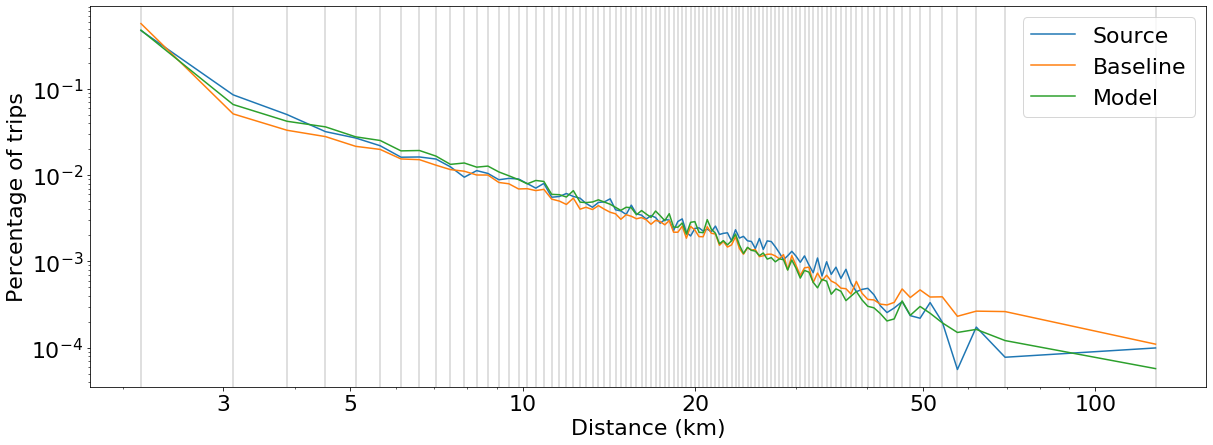

In [30]:
mpl.rcParams['font.size'] = 22.0
fig, ax = plt.subplots(1,1, figsize=(20,7))
plots.generic_plot_dist_distribution(
    ax, 
    [
        dms['groundtruth_sum'],
        dms['baseline_sum'],
        dms['model_sum'],
    ], ["Source", "Baseline", "Model"], ticks=[3, 5, 10, 20, 50, 100])

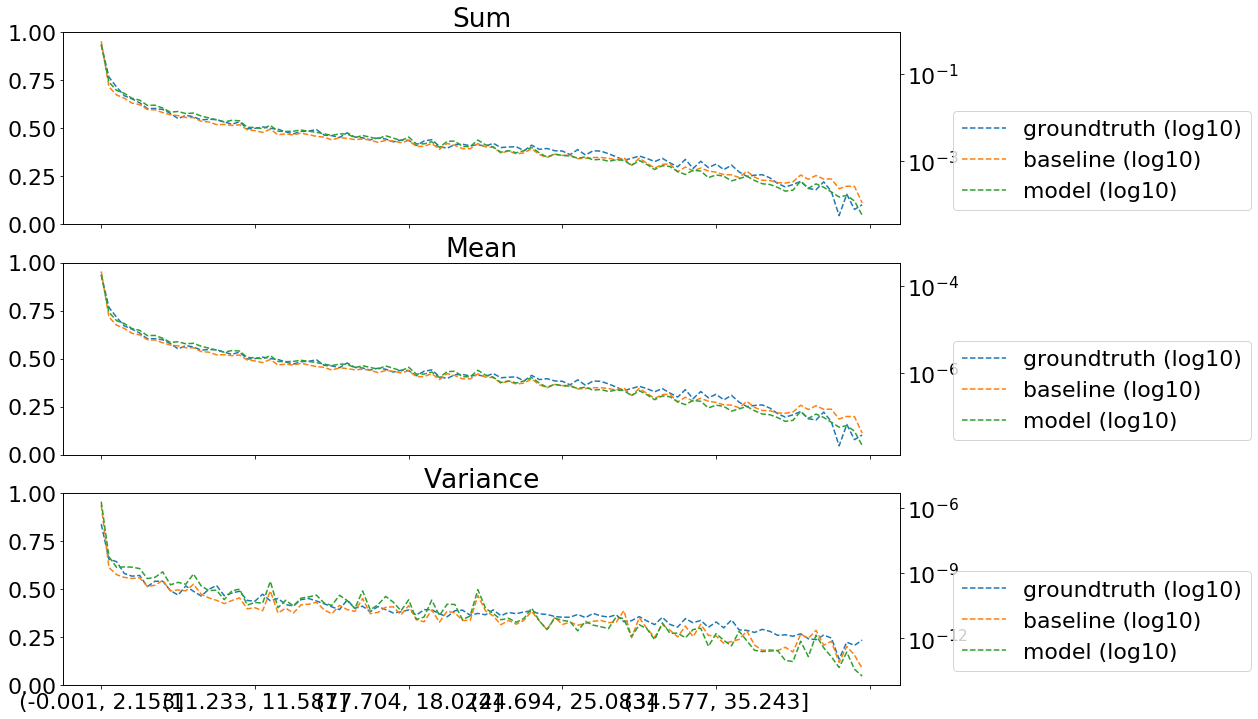

In [31]:
_ = plots.plot_distance_metrics(dms, ['groundtruth', 'baseline', 'model'], show_norm=False)

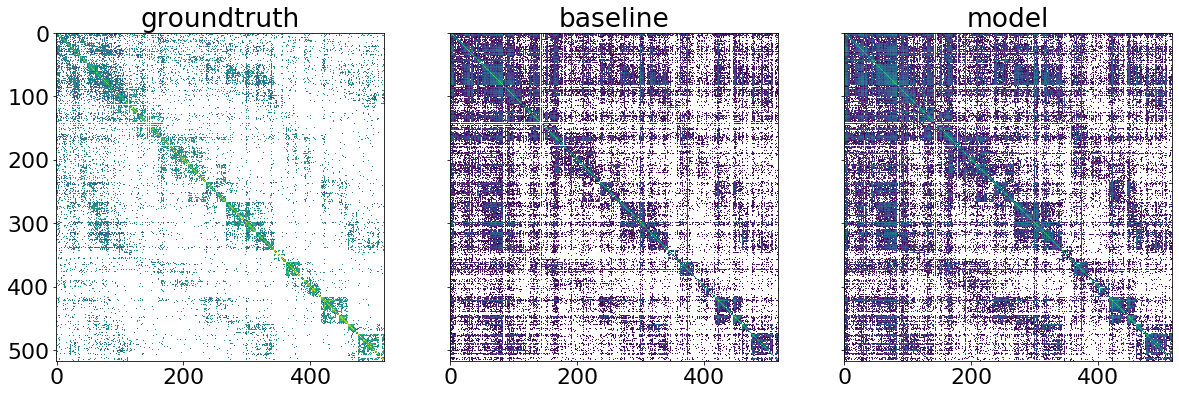

In [32]:
_ = plots.plot_odms([odm, baseline_odm, model_odm], ['groundtruth', 'baseline', 'model'])

In [33]:
model_se = np.square(np.subtract(dms['groundtruth_sum'], dms['model_sum']))
baseline_se = np.square(np.subtract(dms['groundtruth_sum'], dms['baseline_sum']))
print("Model MSE: {:.5e}".format(model_se.mean()))
print("Baseline MSE: {:.5e}".format(baseline_se.mean()))

Model MSE: 5.65455e-06
Baseline MSE: 1.09725e-04


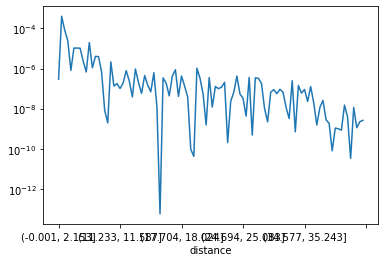

In [217]:
model_se.plot(logy=True)

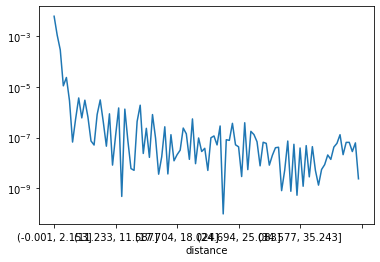

In [218]:
baseline_se.plot(logy=True)